In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:12<00:00, 160MB/s]
100% 1.06G/1.06G [00:12<00:00, 88.8MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [10]:
train_ds= keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

valid_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
def process_s(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process_s)
valid_ds = valid_ds.map(process_s)

In [12]:
# CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_ds,epochs=10,validation_data=valid_ds)

Epoch 1/10
625/625 [==============================] - 75s 105ms/step - loss: 1.2422 - accuracy: 0.6042 - val_loss: 0.5997 - val_accuracy: 0.6816
Epoch 2/10
625/625 [==============================] - 63s 100ms/step - loss: 0.5863 - accuracy: 0.6995 - val_loss: 0.5628 - val_accuracy: 0.7186
Epoch 3/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4882 - accuracy: 0.7639 - val_loss: 0.5195 - val_accuracy: 0.7440
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4356 - accuracy: 0.7998 - val_loss: 0.6417 - val_accuracy: 0.7042
Epoch 5/10
625/625 [==============================] - 64s 101ms/step - loss: 0.3710 - accuracy: 0.8340 - val_loss: 0.5031 - val_accuracy: 0.7260
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2865 - accuracy: 0.8737 - val_loss: 0.5543 - val_accuracy: 0.6924
Epoch 7/10
625/625 [==============================] - 63s 101ms/step - loss: 0.2110 - accuracy: 0.9119 - val_loss: 0.6220 - val_ac

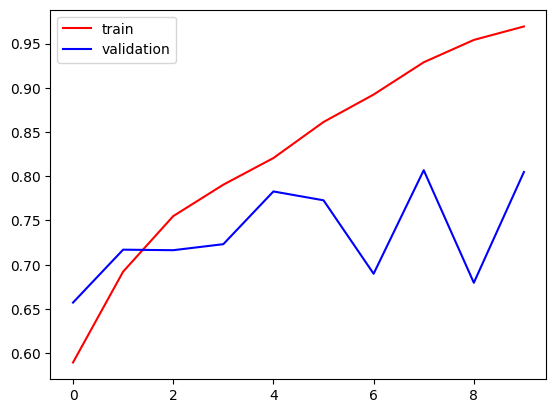

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

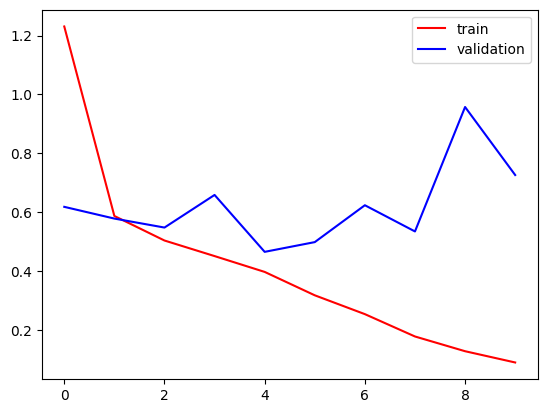

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.jpeg')

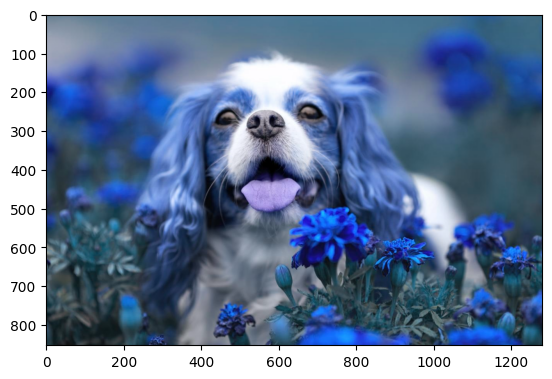

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(853, 1280, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 410ms/step


array([[1.]], dtype=float32)

In [ ]:
test_img = cv2.imread('/content/cat.jpg')

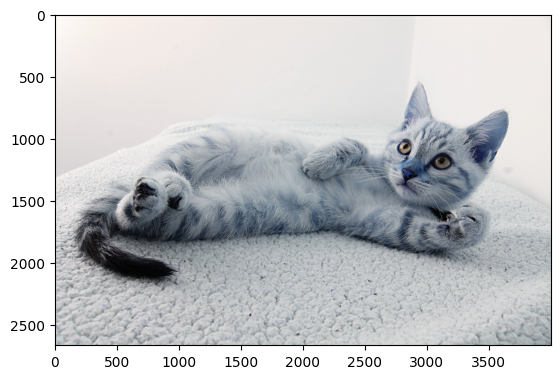

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(2667, 4000, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)